In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import mean_squared_error, mean_absolute_error
import dataloader
import numpy as np
from sklearn.model_selection import train_test_split
from plot_trajectory import plot_paths

In [3]:
dataset = dataloader.load_train()

Initial data manipulation done, computing sliding windows and building x and y tensors . . .


100%|██████████| 59518/59518 [01:23<00:00, 715.70it/s] 


Built tensor lists
Built full tensors
torch.Size([3773409, 30, 4]) torch.Size([3773409, 10, 4])


### Flatten the sequences

In [4]:
X = dataset.tensors[0].reshape(len(dataset), -1).numpy()
y = dataset.tensors[1].reshape(len(dataset),-1).numpy()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Train model

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predict trajectory

In [7]:
y_pred = model.predict(X_test)

# reshape to sequence for plotting/evaluation
y_pred = y_pred.reshape(-1, 10, 4) 
y_true = y_test.reshape(-1, 10, 4)


### Plot the sample

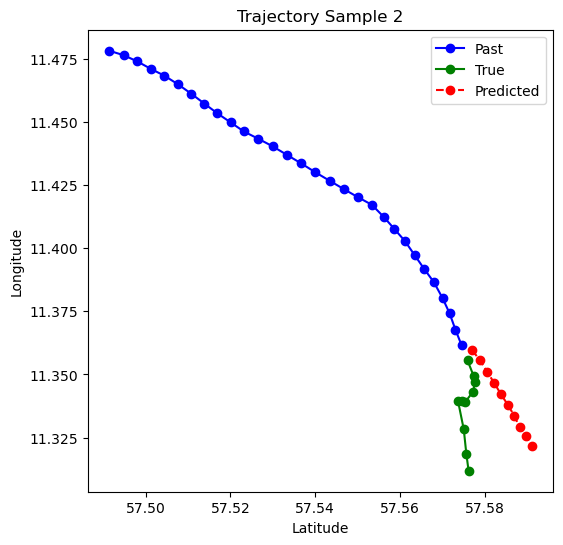

In [20]:
idx = 2
X = X_test[idx]
yt = y_true[idx]
yp = y_pred[idx]

plot = plot_paths(X,yt,yp,idx)

In [26]:
y_true_flat = y_true.reshape(-1, 4)   # shape: (n_samples*10, 4)
y_pred_flat = y_pred.reshape(-1, 4)

mse = mean_squared_error(y_true_flat, y_pred_flat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true_flat, y_pred_flat)

print("MSE:",  mse) 
print("RMSE:", rmse)
print("MAE:", mae)


MSE: 1666.8071
RMSE: 40.82655
MAE: 14.326888
